,Nome da estrela,Nome do planeta,PMterrestres,PRterrestres
0,11 Com,11 Com b,NaN,NaN
1,11 UMi,11 UMi b,NaN,NaN
2,14 And,14 And b,NaN,NaN
3,14 Her,14 Her b,NaN,NaN
4,16 Cyg B,16 Cyg B b,NaN,NaN
...,...,...,...,...
4511,tau Gem,tau Gem b,NaN,NaN
4512,ups And,ups And b,NaN,NaN
4513,ups And,ups And c,NaN,NaN
4514,ups And,ups And d,NaN,NaN


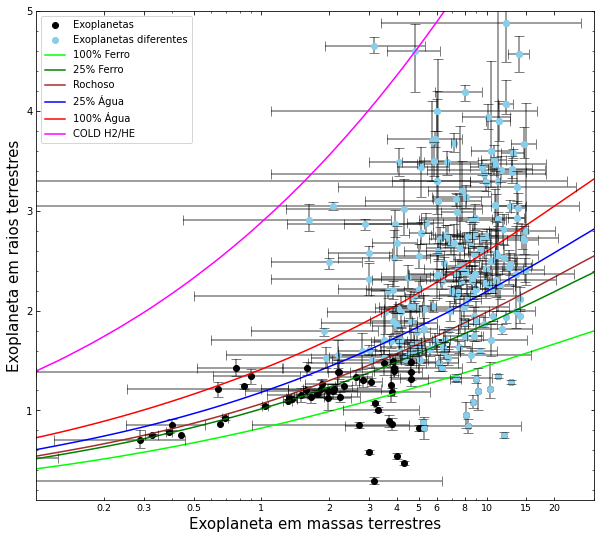

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pylab

df = pd.read_csv('C:/Users/Iagou/OneDrive/Área de Trabalho/UFS/TCC/Python/DF-AGORAVAI-1709.csv',delimiter=',',low_memory = False)


estrela = df['hostname'] #SELEÇÃO DAS COLUNAS

nomedoplaneta = df['pl_name'] #SELEÇÃO DAS COLUNAS

df_massaterr = df['pl_bmasse'][df['pl_bmasse']>0.0][df['pl_bmasse']<5.0]  #DEFINIÇÃO DOS LIMITES E SELEÇÃO DAS COLUNAS
df_raioterr = df['pl_rade'][df['pl_rade']>0.0][df['pl_rade']<1.5]  #DEFINIÇÃO DOS LIMITES E SELEÇÃO DAS COLUNAS

df_massaterr2 = df['pl_bmasse'][df['pl_bmasse']>0.0][df['pl_bmasse']<15.0]  #DEFINIÇÃO DOS LIMITES E SELEÇÃO DAS COLUNAS
df_raioterr2 = df['pl_rade'][df['pl_rade']>0.0][df['pl_rade']<5]  #DEFINIÇÃO DOS LIMITES E SELEÇÃO DAS COLUNAS


df_r1error = df['pl_radeerr1'] #COLUNA DE ERRO DO RAIO UPPER
df_r2error = abs(df['pl_radeerr2']) #COLUNA DE ERRO DO RAIO LOWER

df_mass1error = df['pl_bmasseerr1'] #COLUNA DE ERRO DA MASSA UPPER
df_mass2error = abs(df['pl_bmasseerr2']) #COLUNA DE ERRO DA MASSA LOWER

#vetor = estrela, nomedoplaneta, df_massaterr, df_raioterr
vetor = estrela, nomedoplaneta, df_massaterr2, df_raioterr2

df = pd.DataFrame({'Nome da estrela': vetor[0], 'Nome do planeta': vetor[1], 'PMterrestres': vetor[2],'PRterrestres': vetor[3]})

df.dropna(axis=0, how='any') # COM O DROPNA EU PUDE ANULAR TODOS OS DADOS QUE ERAM 'NaN'

x = df['PMterrestres']
y = df['PRterrestres']


#LEITURA DO DATAFRAME - CURVAS DE DENSIDADE DOS EXOPLANETAS (FERRO,H20, ROCKY...)
den = pd.read_csv('C:/Users/Iagou/OneDrive/Área de Trabalho/UFS/TCC/Python/TabDensidade.txt', delimiter = '\t',low_memory = False)
#den.keys()
#den

#plt.figure(1,figsize = (12,9)) # FORMATO DE FIGURA

fig, ax = plt.subplots(1,figsize = (10,9)) # CRIA A FIGURA E O FORMATO DE FIGURA

ax.set(xlim=(0.1, 30)) 
plt.xscale('log')
ax.set(ylim=(0.1, 5.0))

plt.xticks([ 0.2, 0.3, 0.5, 1, 2, 3, 4, 5,6, 8, 10,15, 20]) # Coloquei os carrapatos na escala do eixo X
ax.set_xticklabels([ '0.2', '0.3', '0.5', '1', '2', '3', '4', '5','6', '8', '10','15', '20'], fontsize = 9.5)  #Mudei o nome dos carrapatos do eixo X

#plt.yticks([ 1, 2, 3, 4, 5]) # Coloquei os carrapatos na escala do eixo X
#ax.set_yticklabels([ '1', '2', '3', '4' ,'5'], fontsize = 9.5)  #Mudei o nome dos carrapatos do eixo X


plt.xlabel('Exoplaneta em massas terrestres',fontsize=15)  #NOME DE X E TAMANHO DA FONTE
plt.ylabel('Exoplaneta em raios terrestres',fontsize=15)  #NOME DE Y E TAMANHO DA FONTE

#ax.grid(color='red',alpha=0.1) #COLOCA GRADE


# PARA FILTRAR OS ELEMENTOS DENTRO DA MINHA LISTA E SELECIONAR PONTOS ESPECIFICOS TIVE QUE ESCREVER O CODIGO DE FORMA QUE ELE
# FIZESSE UMA CONTAGEM (FOR) DENTRO DA MINHA LISTA (Z), COM A CONDIÇÃO (IF) DELIMITANDO OS LIMITES QUE EU QUERIA.
# FEITO ISSO, GRAVEI OS VALORES NA NOVA LISTA (Z1,Z2,Y1,Y2) USANDO O CÓDIGO ( .APPEND() ), DEPOIS FICOU FÁCIL PLOTAR.

            

#ax.plot(x, y,'o', label = 'Exoplanetas',color='k',alpha=1.0)

for i in range (0, len(y)):
    if y[i] > 1.5:
        ax.plot(x[i], y[i],'o',color='Skyblue',alpha=1)
    else:
        ax.plot(x[i], y[i],'o',color='k',alpha=1)
for i in range (0, len(x)):
    if x[i] > 5.0:
        ax.plot(x[i], y[i],'o',color='Skyblue',alpha=1)

#CRIANDO UMA LEGENDA FALSA
ax.plot(1000, 1000, 'o', label = 'Exoplanetas', color = 'k')
ax.plot(1001, 1001, 'o', label = 'Exoplanetas diferentes', color = 'Skyblue')
    
ax.plot(den['Mass'], den['100%fe'], label = '100% Ferro', color = 'Lime')
ax.plot(den['Mass'], den['25%fe '], label = '25% Ferro', color = 'Green')
ax.plot(den['Mass'], den['rocky '], label = 'Rochoso', color = 'Brown')
ax.plot(den['Mass'], den['25%h2o'], label = '25% Água', color = 'Blue' )
ax.plot(den['Mass'], den['100%h2o'], label = '100% Água', color ='Red')
ax.plot(den['Mass'], den['cold_h2/he'], label = 'COLD H2/HE', color = 'Magenta')


#PASSEI MILHARES DE ANOS ATÉ DESCOBRIR QUE O CODIGO NÃO O ACEITA VALORES LOWER NEGATIVOS
#TIVE QUE COLOCAR EM MODULO  '' abs()''

plt.errorbar(x, y, xerr = [df_mass2error, df_mass1error], yerr = [df_r2error, df_r1error], fmt = ' ', color = 'k', alpha = 0.5, capsize = 5)

#plt.legend(('100%ferro','25%ferro','rocky','25%h2o', '100%h2o','cold_h2/he', 'Exoplanetas' ),fontsize=11)

#plt.legend(('100%ferro','75%ferro','50%ferro','30%ferro','25%ferro','20%ferro','rocky','25%h2o','50%h2o', '100%h2o','cold_h2/he', 'Exoplanetas' ),fontsize=11, loc = 4)
#MARKER = 'S'  ... DEIXA O GRÁFICO COM PONTOS QUADRADOS (SQUARE)   ---  (marker='s', s=40)
#plt.legend(('Exoplanetas'), fontsize = 11, loc = 1)


plt.tick_params(axis='x',which='minor',top=True,direction='in')
plt.tick_params(axis='y',which='minor',right=True,direction='in')
plt.tick_params(axis='x',which='major',top=True,direction='in')
plt.tick_params(axis='y',which='major',right=True,direction='in')
plt.minorticks_on()

#plt.clf()

# TEM 52 EXOPLANETAS QUE POSSUEM AS CARACTERISTICAS EXIGIDAS 

plt.legend(loc = 2)

plt.savefig('Grafico3.pdf',dpi=500)

plt.show()

